서울시 물가정보 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 그래프를 노트북 안에 그리기 위한 설정
%matplotlib inline

# matplotlib 한글 폰트 오류 잡기
from matplotlib import font_manager, rc
import matplotlib as mpl
font_path = '../data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
# 데이터 수집

path = '../data/생필품 농수축산물 가격 정보(2021년1월_6월).csv'
pd.read_csv(path, encoding='cp949')

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42694,1636118,226,롯데마트 구로점,171,달걀(10개),10개(600g),2990,2021-01,"국내산,특란",2,대형마트,530000,구로구,2021-01-21
42695,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
42696,1636114,226,롯데마트 구로점,312,애호박,1개 (300g),2790,2021-01,"국내산,청원",2,대형마트,530000,구로구,2021-01-21
42697,1636113,226,롯데마트 구로점,22,오이,1개 (200g),1190,2021-01,"국내산,백오이",2,대형마트,530000,구로구,2021-01-21


In [6]:
raw = pd.read_csv(path, encoding='cp949')

df = raw.copy()

In [7]:
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [8]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [9]:
# 결측치 확인
df.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

In [10]:
# 자료형 확인
df.dtypes

일련번호                  int64
시장/마트 번호              int64
시장/마트 이름             object
품목 번호                 int64
품목 이름                object
실판매규격                object
가격(원)                 int64
년도-월                 object
비고                   object
시장유형 구분(시장/마트) 코드     int64
시장유형 구분(시장/마트) 이름    object
자치구 코드                int64
자치구 이름               object
점검일자                 object
dtype: object

In [11]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [12]:
# 데이터 확인

# 컬럼별(속성정보) 데이터 확인
df['시장/마트 번호']

0          2
1        228
2          1
3         25
4          6
        ... 
42694    226
42695    226
42696    226
42697    226
42698    226
Name: 시장/마트 번호, Length: 42699, dtype: int64

In [14]:
df['시장/마트 번호'].nunique()
# nunique : number of uniques 
# 102개 시장/마트 존재 확인

102

In [15]:
# 시장/마트 목록
df['시장/마트 이름']

0          신세계백화점
1          방배종합시장
2            통인시장
3        방학동도깨비시장
4         이마트 용산점
           ...   
42694    롯데마트 구로점
42695    롯데마트 구로점
42696    롯데마트 구로점
42697    롯데마트 구로점
42698    롯데마트 구로점
Name: 시장/마트 이름, Length: 42699, dtype: object

In [16]:
df['시장/마트 이름'].nunique()

102

In [17]:
df['시장/마트 이름'].unique()

array(['신세계백화점', '방배종합시장', '통인시장', '방학동도깨비시장', '이마트 용산점', '용문시장',
       'NC백화점 불광점', '관악신사시장(신림4동)', '영천시장', '고척근린시장', '이마트 여의도점',
       '현대백화점 미아점', '롯데백화점', '이마트 가양점', '홈플러스 동대문점', '송화시장', '영등포전통시장',
       '홈플러스 등촌점', '후암시장', '경동시장', '롯데마트 강변점', '롯데백화점 노원점', '롯데백화점 청량리점',
       '홈플러스 영등포점', '우림시장', '청량리종합시장', '농협 하나로마트 용산점', '이마트 자양점',
       '롯데백화점 미아점', '자양골목시장', '수유재래시장', '홈플러스 중계점', '금남시장', '인왕시장',
       '원당종합시장', '목3동시장', '신영시장', '이마트 왕십리점', '뉴코아아울렛 강남점', '망원시장',
       '마천중앙시장', '신세계백화점 강남점', '롯데백화점 영등포점', '남성시장', '마포농수산물시장',
       '이마트 창동점', '공릉동 도깨비시장', '홈플러스 면목점', '이마트 청계점', '이마트 성수점',
       '홈플러스 방학점', '이마트 역삼점', '남구로시장', '이마트 은평점', '뚝도시장', '롯데백화점 강남점',
       '노룬산골목시장', '현대백화점 신촌점', '홈플러스 목동점', '태평백화점', '대조시장', '남문시장',
       '광장시장', '대림중앙시장', '남대문시장', '하나로클럽 양재점', '현대시장', '상계중앙시장',
       '농협하나로마트 신촌점', '이마트 신도림점', '신창시장', '롯데백화점 잠실점', '이마트 목동점',
       '홈플러스 잠실점', '대림시장', '홈플러스 시흥점', '암사종합시장', '이마트 상봉점', '숭인시장',
       '둔촌역전통시장', '홈플러스 월드컵점', '도곡시장', '신원시장(신림1동)',

In [18]:
# 시장/마트 목록
# >> 중복 데이터 여부 확인 : 겹치는 게 있나??
# >> 겹치는 게 있다면 >> drop_duplicates()

df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [19]:
df[['시장/마트 번호', '시장/마트 이름','자치구 이름','시장유형 구분(시장/마트) 이름']]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
1,228,방배종합시장,서초구,전통시장
2,1,통인시장,종로구,전통시장
3,25,방학동도깨비시장,도봉구,전통시장
4,6,이마트 용산점,용산구,대형마트
...,...,...,...,...
42694,226,롯데마트 구로점,구로구,대형마트
42695,226,롯데마트 구로점,구로구,대형마트
42696,226,롯데마트 구로점,구로구,대형마트
42697,226,롯데마트 구로점,구로구,대형마트


In [20]:
df_market = \
    df[['시장/마트 번호', '시장/마트 이름','자치구 이름','시장유형 구분(시장/마트) 이름']].drop_duplicates()

In [21]:
# 자치구별 시장/마트 개수

df_market.head()

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
1,228,방배종합시장,서초구,전통시장
2,1,통인시장,종로구,전통시장
3,25,방학동도깨비시장,도봉구,전통시장
4,6,이마트 용산점,용산구,대형마트


In [22]:
df_market['자치구 이름']

0         중구
1        서초구
2        종로구
3        도봉구
4        용산구
        ... 
5339     중랑구
5341     강북구
6609     구로구
21043    도봉구
42682    구로구
Name: 자치구 이름, Length: 102, dtype: object

In [23]:
df_market['자치구 이름'].value_counts()

자치구 이름
중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: count, dtype: int64

In [24]:
df_market['자치구 이름'] == '관악구'

0        False
1        False
2        False
3        False
4        False
         ...  
5339     False
5341     False
6609     False
21043    False
42682    False
Name: 자치구 이름, Length: 102, dtype: bool

In [25]:
condition = df_market['자치구 이름'] == '관악구'

df_market[condition]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
9,207,관악신사시장(신림4동),관악구,전통시장
125,133,원당종합시장,관악구,전통시장
2221,134,신원시장(신림1동),관악구,전통시장
3203,135,롯데백화점 관악점,관악구,대형마트
3344,136,세이브 마트,관악구,대형마트


In [26]:
condition = df_market['자치구 이름'] == '구로구'

df_market[condition]

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
15,109,고척근린시장,구로구,전통시장
298,108,남구로시장,구로구,전통시장
766,110,이마트 신도림점,구로구,대형마트
6609,227,NC백화점 신구로점,구로구,대형마트
42682,226,롯데마트 구로점,구로구,대형마트


In [27]:
df.head(3)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24


In [28]:
df[['품목 번호','품목 이름']]

,품목 번호,품목 이름
0,133,무(세척무)
1,23,상추
2,266,"고등어(생물,국산)"
3,268,"고등어(냉동,국산)"
4,171,달걀(10개)
...,...,...
42694,171,달걀(10개)
42695,27,배
42696,312,애호박
42697,22,오이


In [29]:
df[['품목 번호','품목 이름']].drop_duplicates()

,품목 번호,품목 이름
0,133,무(세척무)
1,23,상추
2,266,"고등어(생물,국산)"
3,268,"고등어(냉동,국산)"
4,171,달걀(10개)
...,...,...
5348,135,"조기(중국산,생물)"
6813,257,"오징어(냉동,수입산)"
15781,316,"고등어(30cm,국산)"
18573,134,달걀(왕란)


In [30]:
df_items = df[['품목 번호','품목 이름']].drop_duplicates()

In [32]:
df_items.sort_values('품목 이름')

,품목 번호,품목 이름
222,13,고등어
135,304,고등어
15781,316,"고등어(30cm,국산)"
1550,318,"고등어(30cm,수입산)"
3,268,"고등어(냉동,국산)"
...,...,...
1397,261,"조기(생물,수입산)"
5348,135,"조기(중국산,생물)"
649,277,호박
18,119,호박(인큐베이터)


In [33]:
df_items = df_items.sort_values('품목 이름')

In [34]:
# 품목 이름 확인 (30개씩 확인)
df_items[:30]

,품목 번호,품목 이름
222,13,고등어
135,304,고등어
15781,316,"고등어(30cm,국산)"
1550,318,"고등어(30cm,수입산)"
3,268,"고등어(냉동,국산)"
4834,269,"고등어(냉동,수입산)"
2,266,"고등어(생물,국산)"
1341,267,"고등어(생물,수입산)"
3984,314,"냉동참조기(20cm,국산)"
3706,313,"냉동참조기(20cm,수입)"


In [35]:
df_items[30:60]


,품목 번호,품목 이름
2457,265,"명태(생물,수입산)"
1019,184,"명태(일본산,냉동)"
79,25,무
103,308,무(1kg)
0,133,무(세척무)
33,282,무(세척무)
2432,274,"무(세척무, 중)"
157,27,배
56,276,배(신고)
4268,248,"배(신고),중급(대)"


In [36]:
df_items[60:]

,품목 번호,품목 이름
10,309,양파(1.5kg망)
2191,272,양파(작은망)
5,22,오이
21,311,오이(다다기)
31,253,오징어
2620,54,오징어(냉동)
441,256,"오징어(냉동,국산)"
6813,257,"오징어(냉동,수입산)"
36,254,"오징어(생물,국산)"
2567,255,"오징어(생물,수입산)"


In [37]:
# 자치구 목록
df.head(3)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24


In [38]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [39]:
df[['자치구 코드','자치구 이름']]

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구
...,...,...
42694,530000,구로구
42695,530000,구로구
42696,530000,구로구
42697,530000,구로구


In [40]:
df[['자치구 코드','자치구 이름']].drop_duplicates()

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구
7,380000,은평구
9,620000,관악구
13,410000,서대문구
15,530000,구로구
17,560000,영등포구


In [41]:
df_gu = df[['자치구 코드','자치구 이름']].drop_duplicates()

In [42]:
df_gu.shape

(25, 2)

In [43]:
df_gu.head()

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구


In [44]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [45]:
# 시장유형

df[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']]

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장
2,1,전통시장
3,1,전통시장
4,2,대형마트
...,...,...
42694,2,대형마트
42695,2,대형마트
42696,2,대형마트
42697,2,대형마트


In [46]:
df[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']].drop_duplicates()

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


In [47]:
df_gubun = df[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']].drop_duplicates()

In [48]:
# 삼겹살 가격 분석

df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [49]:
df['품목 이름']

0            무(세척무)
1                상추
2        고등어(생물,국산)
3        고등어(냉동,국산)
4           달걀(10개)
            ...    
42694       달걀(10개)
42695             배
42696           애호박
42697            오이
42698            명태
Name: 품목 이름, Length: 42699, dtype: object

In [51]:
df['품목 이름'].str.contains('삼겹살')
# str.contains : 문자 중에 '삼겹살'이 포함되어 있는 거 출력해줘

0        False
1        False
2        False
3        False
4        False
         ...  
42694    False
42695    False
42696    False
42697    False
42698    False
Name: 품목 이름, Length: 42699, dtype: bool

In [56]:
condition = (df['품목 이름'].str.contains('삼겹살')) & (df['년도-월']=='2021-06')

In [57]:
df[condition]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
34,1667081,10,용문시장,99,돼지고기(생삼겹살),100g,2600,2021-06,대전한돈,1,전통시장,170000,용산구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,1673495,10,용문시장,99,돼지고기(생삼겹살),100g,2750,2021-06,대전 한돈,1,전통시장,170000,용산구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6720,1670803,10,용문시장,99,돼지고기(생삼겹살),100g,2750,2021-06,대전 한돈,1,전통시장,170000,용산구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [58]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [59]:
condition = \
    (df['품목 이름'].str.contains('삼겹살')) & (df['년도-월']=='2021-06') &\
    (df['실판매규격'].str.contains('600g'))

In [60]:
df[condition]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,1668261,100,홈플러스 중계점,99,돼지고기(생삼겹살),600g,22140,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
6514,1674124,40,홈플러스 등촌점,99,돼지고기(생삼겹살),600g,14940,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [61]:
df_sam = df[condition]

In [62]:
df_sam.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [63]:
# 삼겹살 600g 평균 가격은?

df_sam['가격(원)'].mean()

16842.723214285714

In [64]:
# 삼겹살 600g 최고 가격은?
df_sam['가격(원)'].max()

35890

In [65]:
# 삼겹살 600g 최저 가격은?
df_sam['가격(원)'].min()

1690

In [66]:
# 대체 가장 비싼 데는 어디야?

df_sam[df_sam['가격(원)'] == 35890]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4043,1668108,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,35890,2021-06,국내산,2,대형마트,710000,송파구,2021-06-24
4064,1674531,147,롯데백화점 잠실점,99,돼지고기(생삼겹살),600g,35890,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24


In [68]:
# 어떠헥 저렇게 싸지?
df_sam[df_sam['가격(원)'] == 1690]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


In [69]:
df_sam[df_sam['가격(원)'] < 5000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3645,1667404,27,이마트 창동점,99,돼지고기(생삼겹살),600g,2720,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


우리 동네 삼겹살 가격?

In [90]:
gu = input('당신이 사는 구 이름은?')

In [91]:
gu

'도봉구'

In [92]:
df_sam.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [93]:
condition = (df_sam['자치구 이름'] == gu)

In [94]:
df_sam[condition]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
2689,1670184,25,방학동도깨비시장,99,돼지고기(생삼겹살),600g,13800,2021-06,국내산 한돈,1,전통시장,320000,도봉구,2021-06-24
2698,1671109,25,방학동도깨비시장,99,돼지고기(생삼겹살),600g,12000,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
2719,1673750,25,방학동도깨비시장,99,돼지고기(생삼겹살),600g,12000,2021-06,국내산 한돈,1,전통시장,320000,도봉구,2021-06-24
2741,1667387,25,방학동도깨비시장,99,돼지고기(생삼겹살),600g,12000,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
3100,1667421,26,신창시장,99,돼지고기(생삼겹살),600g,13980,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
3188,1671143,26,신창시장,99,돼지고기(생삼겹살),600g,15180,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
3196,1673784,26,신창시장,99,돼지고기(생삼겹살),600g,15180,2021-06,국내산 도드람,1,전통시장,320000,도봉구,2021-06-24
3205,1670218,26,신창시장,99,돼지고기(생삼겹살),600g,12500,2021-06,국내산 도드람,1,전통시장,320000,도봉구,2021-06-24
3593,1673767,27,이마트 창동점,99,돼지고기(생삼겹살),600g,14100,2021-06,국내산 도드람,2,대형마트,320000,도봉구,2021-06-24
3603,1670201,27,이마트 창동점,99,돼지고기(생삼겹살),600g,18600,2021-06,국내산 도드람,2,대형마트,320000,도봉구,2021-06-24


In [95]:
df_sam.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [96]:
df_sam[condition][['시장/마트 이름','품목 이름','실판매규격','가격(원)']]

,시장/마트 이름,품목 이름,실판매규격,가격(원)
2689,방학동도깨비시장,돼지고기(생삼겹살),600g,13800
2698,방학동도깨비시장,돼지고기(생삼겹살),600g,12000
2719,방학동도깨비시장,돼지고기(생삼겹살),600g,12000
2741,방학동도깨비시장,돼지고기(생삼겹살),600g,12000
3100,신창시장,돼지고기(생삼겹살),600g,13980
3188,신창시장,돼지고기(생삼겹살),600g,15180
3196,신창시장,돼지고기(생삼겹살),600g,15180
3205,신창시장,돼지고기(생삼겹살),600g,12500
3593,이마트 창동점,돼지고기(생삼겹살),600g,14100
3603,이마트 창동점,돼지고기(생삼겹살),600g,18600


In [97]:
df_sam_gu = \
    df_sam[condition][['시장/마트 이름','품목 이름','실판매규격','가격(원)']]

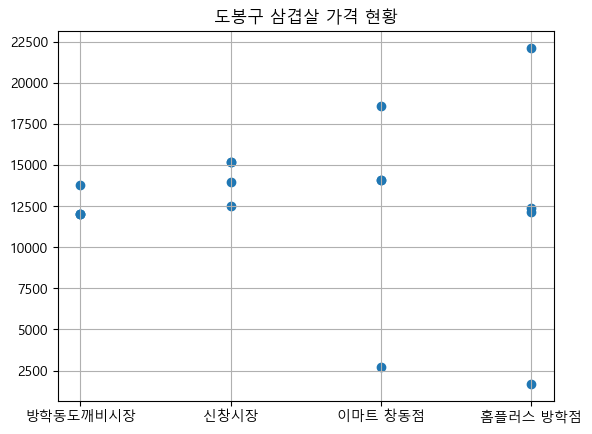

In [98]:
# 데이터 시각화

x = df_sam_gu['시장/마트 이름']
y = df_sam_gu['가격(원)']

plt.scatter(x,y)
plt.title(gu + ' 삼겹살 가격 현황')
plt.grid()
plt.show()

마트 지점별 삼겹살 가격

In [99]:
df_sam.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [131]:
mart = input('시장/마트 이름 : ')
mart

'이마트'

In [132]:
# 마트 지점별 삼겹살 가격

df_sam['시장/마트 이름']

22      현대백화점 미아점
47      롯데백화점 노원점
76        이마트 가양점
86        이마트 가양점
146       이마트 가양점
          ...    
6439     홈플러스 중계점
6514     홈플러스 등촌점
6700    현대백화점 미아점
6721    현대백화점 미아점
6763    현대백화점 미아점
Name: 시장/마트 이름, Length: 224, dtype: object

In [133]:
df_sam[df_sam['시장/마트 이름'].str.contains(mart)]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
325,1673529,75,이마트 성수점,202,돼지고기(생삼겹살),600g,15480,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24
459,1668665,80,이마트 자양점,99,돼지고기(생삼겹살),600g,14880,2021-06,국내산.도드람,2,대형마트,215000,광진구,2021-06-24
745,1670956,80,이마트 자양점,99,돼지고기(생삼겹살),600g,22080,2021-06,국내산.제주,2,대형마트,215000,광진구,2021-06-24
1021,1671398,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14100,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
3436,1669038,74,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14880,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24
3461,1673546,74,이마트 왕십리점,202,돼지고기(생삼겹살),600g,15480,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24
3477,1670854,74,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14100,2021-06,국내산,2,대형마트,200000,성동구,2021-06-24


In [134]:
df_sam_mart = df_sam[df_sam['시장/마트 이름'].str.contains(mart)]

In [135]:
df_sam_mart.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [136]:
df_sam_mart[['시장/마트 이름','품목 번호', '품목 이름', '실판매규격', '가격(원)']]

,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원)
76,이마트 가양점,99,돼지고기(생삼겹살),600g,15480
86,이마트 가양점,99,돼지고기(생삼겹살),600g,14880
146,이마트 가양점,99,돼지고기(생삼겹살),600g,14880
325,이마트 성수점,202,돼지고기(생삼겹살),600g,15480
459,이마트 자양점,99,돼지고기(생삼겹살),600g,14880
745,이마트 자양점,99,돼지고기(생삼겹살),600g,22080
1021,이마트 가양점,99,돼지고기(생삼겹살),600g,14100
3436,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14880
3461,이마트 왕십리점,202,돼지고기(생삼겹살),600g,15480
3477,이마트 왕십리점,202,돼지고기(생삼겹살),600g,14100


In [139]:
len(df_sam_mart[['시장/마트 이름','품목 번호', '품목 이름', '실판매규격', '가격(원)']])

28

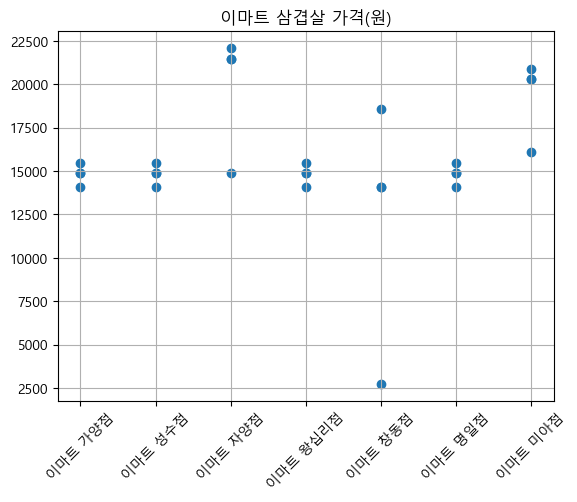

In [140]:
# 시각화

x = df_sam_mart['시장/마트 이름']
y = df_sam_mart['가격(원)']

plt.scatter(x,y)
plt.grid()
plt.title(mart + ' 삼겹살 가격(원)')
plt.xticks(rotation = 45)

plt.show()

In [141]:
# In-class Practice

# 미션 : 달걀 가격 분석해 보세요.
# 조건 : 포함되어야 할 문자 : 달걀, 30개
# 어떤 구가 가장 싸고 비싼지  시각화로 확인

In [143]:
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [167]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [199]:
df['품목 이름'].str.contains('달걀')

0        False
1        False
2        False
3        False
4         True
         ...  
42694     True
42695    False
42696    False
42697    False
42698    False
Name: 품목 이름, Length: 42699, dtype: bool

In [200]:
df[df['품목 이름'].str.contains('달걀')]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
11,1671112,25,방학동도깨비시장,320,달걀(30개),1.8kg,9500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
26,1668433,16,현대백화점 미아점,171,달걀(10개),10개,6000,2021-06,하람드림특란,2,대형마트,290000,성북구,2021-06-24
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42666,1633869,40,홈플러스 등촌점,171,달걀(10개),10개(600g),3490,2021-01,"국내산,특란",2,대형마트,500000,강서구,2021-01-28
42674,1633904,109,고척근린시장,320,달걀(30개),특란1800g,5000,2021-01,국내산,1,전통시장,530000,구로구,2021-01-28
42679,1632325,109,고척근린시장,320,달걀(30개),30개(1.5kg),5000,2021-01,"국내산,특란",1,전통시장,530000,구로구,2021-01-28
42686,1636119,226,롯데마트 구로점,320,달걀(30개),30개(1.8kg),6990,2021-01,"국내산,특란",2,대형마트,530000,구로구,2021-01-21


In [201]:
condition = (df['품목 이름'].str.contains('달걀')) & (df['실판매규격'].str.contains('30')) & (df['년도-월'].str.contains('2021-06'))

In [202]:
df[condition]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
75,1667237,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,1667596,102,목3동시장,320,달걀(30개),30구,10100,2021-06,"국내산,정심특란",1,전통시장,470000,양천구,2021-06-24
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24
6779,1674903,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24


In [203]:
df_egg = df[condition]

In [204]:
df_egg.head(3)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24


In [205]:
df_egg.shape

(331, 14)

In [206]:
# 달걀 평균가
df_egg['가격(원)'].mean()

9040.308157099698

In [207]:
# 달걀 최고가
df_egg['가격(원)'].max()

75000

In [208]:
# 달걀 최저가
df_egg['가격(원)'].min()
# 0원??

0

In [209]:
# 최고가 판매점
df_egg[df_egg['가격(원)'] == 75000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
414,1669381,108,남구로시장,320,달걀(30개),30개(1.5kg),75000,2021-06,"국내산,특란",1,전통시장,530000,구로구,2021-06-24


In [210]:
# 최저가 판매점
df_egg[df_egg['가격(원)'] == 0]

# 0원 이유 : 입고안됨 및 없어서

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
1139,1671027,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
3953,1671893,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
3982,1669551,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
4049,1668111,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
4057,1674534,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
5002,1669143,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
5051,1673719,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
5092,1667271,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
6705,1671995,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24


In [211]:
# 0원 가격 제외
df_egg = df_egg[df_egg['가격(원)'] != 0]
df_egg

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
75,1667237,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
82,1674093,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,1668990,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
6749,1667596,102,목3동시장,320,달걀(30개),30구,10100,2021-06,"국내산,정심특란",1,전통시장,470000,양천구,2021-06-24
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24


In [212]:
# 0원 제외 최저가
df_egg['가격(원)'].min()

5520

In [214]:
# 0원 제외 최저가 판매처
df_egg[df_egg['가격(원)'] == 5520]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
1477,1669024,75,이마트 성수점,320,달걀(30개),30개,5520,2021-06,국내산신선한란,2,대형마트,200000,성동구,2021-06-24


In [215]:
df_egg.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [220]:
gu = input('확인하고 싶은 자치구 이름 : ')
gu

'양천구'

In [225]:
condition = (df_egg['자치구 이름'] == gu)

In [226]:
df_egg[condition][['시장/마트 이름', '품목 이름','가격(원)','자치구 이름']]

,시장/마트 이름,품목 이름,가격(원),자치구 이름
184,신영시장,달걀(30개),7000,양천구
212,신영시장,달걀(30개),7000,양천구
254,신영시장,달걀(30개),7000,양천구
288,신영시장,달걀(30개),7980,양천구
463,목3동시장,달걀(30개),9800,양천구
3074,이마트 목동점,달걀(30개),7980,양천구
5714,홈플러스 목동점,달걀(30개),6950,양천구
5723,홈플러스 목동점,달걀(30개),6900,양천구
5733,홈플러스 목동점,달걀(30개),6590,양천구
5753,홈플러스 목동점,달걀(30개),6900,양천구


In [227]:
df_egg_gu = df_egg[condition][['시장/마트 이름', '품목 이름','가격(원)','자치구 이름']]
df_egg_gu

,시장/마트 이름,품목 이름,가격(원),자치구 이름
184,신영시장,달걀(30개),7000,양천구
212,신영시장,달걀(30개),7000,양천구
254,신영시장,달걀(30개),7000,양천구
288,신영시장,달걀(30개),7980,양천구
463,목3동시장,달걀(30개),9800,양천구
3074,이마트 목동점,달걀(30개),7980,양천구
5714,홈플러스 목동점,달걀(30개),6950,양천구
5723,홈플러스 목동점,달걀(30개),6900,양천구
5733,홈플러스 목동점,달걀(30개),6590,양천구
5753,홈플러스 목동점,달걀(30개),6900,양천구


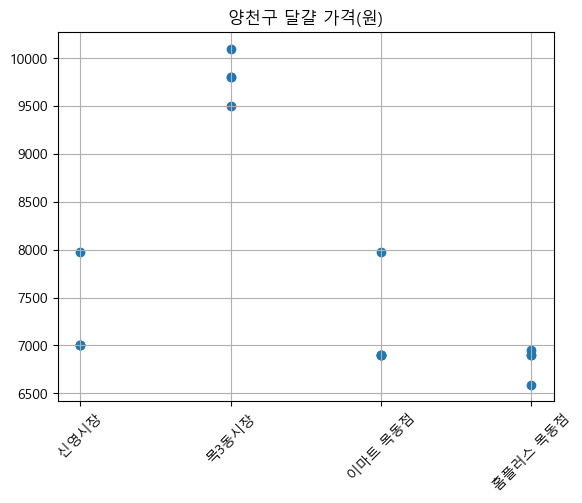

In [228]:
# 시각화

x = df_egg_gu['시장/마트 이름']
y = df_egg_gu['가격(원)']

plt.scatter(x,y)
plt.grid()
plt.title(gu + ' 달걀 가격(원)')
plt.xticks(rotation = 45)
plt.show()

In [229]:
# 강사님 코드

In [230]:
df[df['가격(원)'] <0]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자


In [231]:
condition =\
    (df['품목 이름'].str.contains('달걀')) & (df['실판매규격'].str.contains('30개'))

In [232]:
df[condition]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
75,1667237,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42610,1635261,136,세이브 마트,320,달걀(30개),30개,6980,2021-01,국내산시골계란특,2,대형마트,620000,관악구,2021-01-28
42636,1634174,45,롯데백화점 강남점,320,달걀(30개),30개,15000,2021-01,국내산,2,대형마트,680000,강남구,2021-01-28
42650,1633700,220,롯데슈퍼,320,달걀(30개),"30개(대란 1,560g)",5990,2021-01,판계란,2,대형마트,410000,서대문구,2021-01-28
42679,1632325,109,고척근린시장,320,달걀(30개),30개(1.5kg),5000,2021-01,"국내산,특란",1,전통시장,530000,구로구,2021-01-28


In [233]:
df_egg = df[condition]

In [234]:
df_egg['가격(원)']

28           0
43       10800
52       10500
62        6900
75       10800
         ...  
42610     6980
42636    15000
42650     5990
42679     5000
42686     6990
Name: 가격(원), Length: 2053, dtype: int64

In [236]:
condition =\
    (df['품목 이름'].str.contains('달걀')) & (df['실판매규격'].str.contains('30개')) & (df['가격(원)'] > 0)

In [237]:
df[condition]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
75,1667237,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
82,1674093,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42610,1635261,136,세이브 마트,320,달걀(30개),30개,6980,2021-01,국내산시골계란특,2,대형마트,620000,관악구,2021-01-28
42636,1634174,45,롯데백화점 강남점,320,달걀(30개),30개,15000,2021-01,국내산,2,대형마트,680000,강남구,2021-01-28
42650,1633700,220,롯데슈퍼,320,달걀(30개),"30개(대란 1,560g)",5990,2021-01,판계란,2,대형마트,410000,서대문구,2021-01-28
42679,1632325,109,고척근린시장,320,달걀(30개),30개(1.5kg),5000,2021-01,"국내산,특란",1,전통시장,530000,구로구,2021-01-28


In [238]:
df_egg = df[condition]

In [239]:
df_egg['가격(원)']

43       10800
52       10500
62        6900
75       10800
82        6900
         ...  
42610     6980
42636    15000
42650     5990
42679     5000
42686     6990
Name: 가격(원), Length: 1989, dtype: int64

In [240]:
# 최고가
df_egg['가격(원)'].max()

75000

In [241]:
# 평균가
df_egg['가격(원)'].mean()

8397.993966817496

In [242]:
# 최저가
df_egg['가격(원)'].min()

800

우리 동네 달걀 가격

In [243]:
gu = input('당신이 사는 구는?')
gu

'강남구'

In [244]:
df_egg[df_egg['자치구 이름'] == gu]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
436,1671842,44,이마트 역삼점,320,달걀(30개),30개,12360,2021-06,국내산 난이생생,2,대형마트,680000,강남구,2021-06-24
542,1669483,44,이마트 역삼점,320,달걀(30개),30개,7980,2021-06,국내산,2,대형마트,680000,강남구,2021-06-24
1002,1674432,45,롯데백화점 강남점,320,달걀(30개),30개,17000,2021-06,국내산,2,대형마트,680000,강남구,2021-06-24
1016,1668026,45,롯데백화점 강남점,320,달걀(30개),30개,17000,2021-06,국내산,2,대형마트,680000,강남구,2021-06-24
1044,1671808,45,롯데백화점 강남점,320,달걀(30개),30개,17000,2021-06,국내산,2,대형마트,680000,강남구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40953,1634976,215,청담삼익시장,320,달걀(30개),30개,7600,2021-01,국내산 신선란,1,전통시장,680000,강남구,2021-01-28
41413,1634208,44,이마트 역삼점,320,달걀(30개),30개,8960,2021-01,국내산 난이생생,2,대형마트,680000,강남구,2021-01-28
41419,1637769,215,청담삼익시장,320,달걀(30개),30개,8500,2021-01,국내산 신선란,1,전통시장,680000,강남구,2021-01-28
41614,1637820,44,이마트 역삼점,320,달걀(30개),30개,6980,2021-01,국내산,2,대형마트,680000,강남구,2021-01-28


In [245]:
df_egg.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [246]:
df_egg[df_egg['자치구 이름'] == gu][['시장/마트 이름','품목 이름', '실판매규격', '가격(원)']]

,시장/마트 이름,품목 이름,실판매규격,가격(원)
436,이마트 역삼점,달걀(30개),30개,12360
542,이마트 역삼점,달걀(30개),30개,7980
1002,롯데백화점 강남점,달걀(30개),30개,17000
1016,롯데백화점 강남점,달걀(30개),30개,17000
1044,롯데백화점 강남점,달걀(30개),30개,17000
...,...,...,...,...
40953,청담삼익시장,달걀(30개),30개,7600
41413,이마트 역삼점,달걀(30개),30개,8960
41419,청담삼익시장,달걀(30개),30개,8500
41614,이마트 역삼점,달걀(30개),30개,6980


In [247]:
df_egg_gu = df_egg[df_egg['자치구 이름'] == gu][['시장/마트 이름','품목 이름', '실판매규격', '가격(원)']]

In [248]:
df_egg_gu.sort_values('가격(원)')

,시장/마트 이름,품목 이름,실판매규격,가격(원)
30207,이마트 역삼점,달걀(30개),30개,4980
36453,이마트 역삼점,달걀(30개),30개,5980
38361,청담삼익시장,달걀(30개),30개,6500
37171,도곡시장,달걀(30개),30개,6880
37851,도곡시장,달걀(30개),30개,6880
...,...,...,...,...
1054,롯데백화점 강남점,달걀(30개),30개,17000
1044,롯데백화점 강남점,달걀(30개),30개,17000
1016,롯데백화점 강남점,달걀(30개),30개,17000
1002,롯데백화점 강남점,달걀(30개),30개,17000


In [249]:
df_egg_gu = df_egg_gu.sort_values('가격(원)')

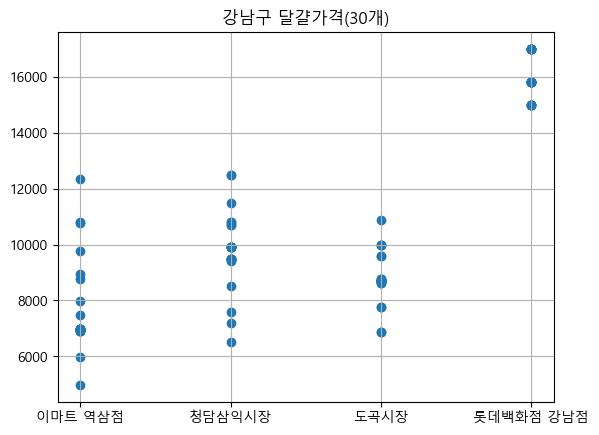

In [251]:
# 시각화

x = df_egg_gu['시장/마트 이름']
y = df_egg_gu['가격(원)']

plt.scatter(x,y)
plt.grid()
plt.title(gu + ' 달걀가격(30개)')
plt.show()

In [258]:
# 마트 지점별 달걀 가격
mart_branch = input('마트 이름 : ')
mart_branch

'이마트'

In [259]:
# 마트 지점별 달걀 가격
df_egg['시장/마트 이름']

43        롯데마트 강변점
52            용문시장
62         이마트 가양점
75        롯데마트 강변점
82         이마트 가양점
           ...    
42610       세이브 마트
42636    롯데백화점 강남점
42650         롯데슈퍼
42679       고척근린시장
42686     롯데마트 구로점
Name: 시장/마트 이름, Length: 1989, dtype: object

In [261]:
df_egg[df_egg['시장/마트 이름'].str.contains(mart_branch)]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
82,1674093,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
138,1667687,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
152,1668837,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
436,1671842,44,이마트 역삼점,320,달걀(30개),30개,12360,2021-06,국내산 난이생생,2,대형마트,680000,강남구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41999,1633207,75,이마트 성수점,320,달걀(30개),30개,6980,2021-01,국내산일판란특란,2,대형마트,200000,성동구,2021-01-28
42094,1637617,22,이마트 여의도점,320,달걀(30개),30개,5980,2021-01,특란,2,대형마트,560000,영등포구,2021-01-28
42292,1637201,53,이마트 은평점,320,달걀(30개),30개(1800g),5980,2021-01,품절,2,대형마트,380000,은평구,2021-01-28
42294,1632011,53,이마트 은평점,320,달걀(30개),30개(1.8kg),5980,2021-01,"국내산,특란",2,대형마트,380000,은평구,2021-01-28


In [262]:
df_egg_branch = df_egg[df_egg['시장/마트 이름'].str.contains(mart_branch)]

In [263]:
df_egg_branch.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [264]:
df_egg_branch[['시장/마트 이름','품목 이름', '실판매규격', '가격(원)']]

,시장/마트 이름,품목 이름,실판매규격,가격(원)
62,이마트 가양점,달걀(30개),30개(1800g),6900
82,이마트 가양점,달걀(30개),30개(1800g),6900
138,이마트 가양점,달걀(30개),30개(1800g),6900
152,이마트 가양점,달걀(30개),30개(1800g),6900
436,이마트 역삼점,달걀(30개),30개,12360
...,...,...,...,...
41999,이마트 성수점,달걀(30개),30개,6980
42094,이마트 여의도점,달걀(30개),30개,5980
42292,이마트 은평점,달걀(30개),30개(1800g),5980
42294,이마트 은평점,달걀(30개),30개(1.8kg),5980


In [265]:
df_egg_branch[['시장/마트 이름','품목 이름', '실판매규격', '가격(원)']].drop_duplicates()

,시장/마트 이름,품목 이름,실판매규격,가격(원)
62,이마트 가양점,달걀(30개),30개(1800g),6900
436,이마트 역삼점,달걀(30개),30개,12360
542,이마트 역삼점,달걀(30개),30개,7980
1212,이마트 용산점,달걀(30개),30개,6900
1395,이마트 청계점,달걀(30개),30개,7180
...,...,...,...,...
41481,이마트 왕십리점,달걀(30개),30개,65800
41484,이마트 왕십리점,달걀(30개),30개,7580
41494,이마트 가양점,달걀(30개),30개(1800g),5980
41971,이마트 창동점,달걀(30개),30개(1.8kg),6980


In [266]:
df_egg_branch_mod = df_egg_branch[['시장/마트 이름','품목 이름', '실판매규격', '가격(원)']].drop_duplicates()

In [268]:
df_egg_branch_mod['가격(원)'].mean()

7991.563025210084

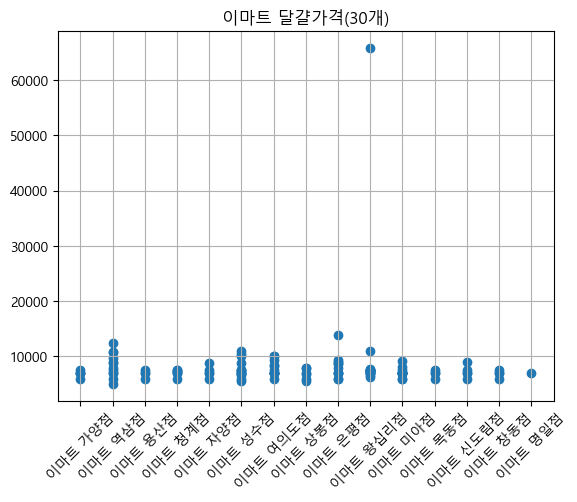

In [269]:
# 시각화

x = df_egg_branch_mod['시장/마트 이름']
y = df_egg_branch_mod['가격(원)']

plt.scatter(x,y)
plt.title(mart_branch + ' 달걀가격(30개)')
plt.xticks(rotation = 45)
plt.grid()

plt.show()

In [270]:
# 추가 분석
df_egg_branch_mod['실판매규격']

62       30개(1800g)
436             30개
542             30개
1212            30개
1395            30개
            ...    
41481           30개
41484           30개
41494    30개(1800g)
41971    30개(1.8kg)
42292    30개(1800g)
Name: 실판매규격, Length: 119, dtype: object

In [271]:
df_egg_branch_mod['실판매규격'].unique()

array(['30개(1800g)', '30개', '30개 ', '30개(1.56kg)', '30개(1560g)',
       '30개(1.8kg)', '30개(특란)', '30개((1.8kg)', '30개(1,800g)',
       '30개 (1,800g)', '30개(1,560g)', '30개 1.8kg', '30개(1.68kg)',
       '30개 (1,800원)'], dtype=object)

In [272]:
# 변수 정리
# 기준 >> 함수